ROBT 407 | Fall 2021

Midterm Project

Team members and contribution:
- Danel Batyrbek (Tasks 2, 3)
- Nuradil Kozhahmet (Tasks 3, 4)
- Saniya Abushakimova (Tasks 1, 3)

# Task 1. Linear Regression

Implement the Linear Regression algorithm.

Done by:
* Saniya Abushakimova

#### Subtask 1: 
Generate a training data set of size 100 as directed by Exercise 3.2 of LFD. Generate a test set of size 1000 of the same nature.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import warnings

def warn(*args, **kwargs):
    return

warnings.warn = warn

In [ ]:
# Function for generating random data.
def generate_points(n):
    X = np.random.rand(n,2)*100 # Generate random numbers.
    return X

In [ ]:
# Simple random target function.
def f_x(x):
    return x

In [ ]:
# Function for classifying the data points.
def classify(X):
    labels = [] # A list to keep the labels.
    for xi in X:
        if (xi[1] > xi[0]):
            labels.append(1)
        else:
            labels.append(-1)
    labels_array = np.array(labels) 
    X = np.insert(X, 2, labels_array, axis=1) # Adding labels to the existing array of data.
    
    N = int((X.shape[0])/10)
    rand_indices = random.sample(range(0, X.shape[0]), N)
    
    for i in rand_indices:
        X[i,-1]=X[i,-1]*(-1)
        
    return X

In [ ]:
# Visualization of the target function f(x) and the generated points.
def visualize(data):
    df_data = pd.DataFrame({"X1":data[:,0],
                            "X2":data[:,1],
                            "Label":data[:,2]})
    
    groups = df_data.groupby("Label")
    for name, group in groups:
        plt.plot(group["X1"], group["X2"], marker = "o", linestyle="", label=name)

    x = np.linspace(0,100,100)
    plt.plot(x,f_x(x),color='g',label='f(x)')

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend(loc='upper right')
    plt.show()

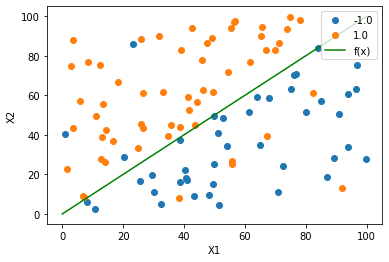

In [ ]:
# Randomly generate 100 points for training set.
rand_train_data = generate_points(n = 100)
train_data = classify(rand_train_data)
visualize(train_data)

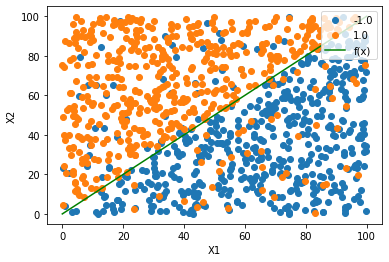

In [ ]:
# Randomly generate 1000 points for test set.
rand_test_data = generate_points(n = 1000)
test_data = classify(rand_test_data)
visualize(test_data)

#### Subtask 2:
Run the pocket algorithm (Homework 1) on the training set for T = 1000 to get $w_{pocket}$.

In [ ]:
# Function for adding an artificial column X0 in our data.
def add_ones(data):
    np_ones = np.ones((data.shape[0],1))
    data = np.append(np_ones, data, axis=1)
    return data

In [ ]:
# Function for calculating E_in.
def error(data, w):
    misclassified = 0
    N = data.shape[0]
    d = data.shape[1]-1
    
    # Calculating the number of misclassified points.
    for i in range(N):
        if (np.sign(np.dot(w.T, data[i,0:d])) != data[i,d]):
            misclassified += 1
            
    E = misclassified/N
    
    return E

In [ ]:
# Pocket PLA Algorithm.
def pocket_pla(data, T):
    d = data.shape[1]-1
    w = np.zeros((d,1))
    E_prev = error(data, w)
    
    for t in range(T):
        misclassified_idx = [] # For storing misclassified indices.
        
        for i in range(data.shape[0]):
            if (np.sign(np.dot(w.T, data[i,0:d])) != data[i,d]):
                misclassified_idx.append(i)
        
        # Randonmly picking a misclassified point.
        random_idx = random.choice(misclassified_idx) 
        w_new = w + np.reshape((data[random_idx, d]*data[random_idx, 0:d]), (-1,1))
        E = error(data, w_new)
        
        # Checking if the error of w_new is smaller than error of w from previous iteration.
        if (E_prev > E):
            w = w_new
            E_prev = E
    
    return w

In [ ]:
train_data_final = add_ones(train_data)

In [ ]:
w_pocket = pocket_pla(train_data_final, 1000)

In [ ]:
w_pocket

array([[ -1.        ],
       [-43.16893984],
       [ 46.43209707]])

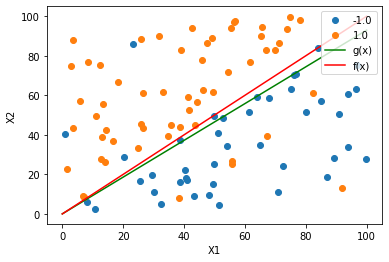

In [ ]:
# Visualization of both g(x) and f(x) functions.
df_data = pd.DataFrame({"X1":train_data_final[:,1],
                        "X2":train_data_final[:,2],
                        "Label":train_data_final[:,3]})
groups_pla = df_data.groupby("Label")

for name_pla, group_pla in groups_pla:
    plt.plot(group_pla["X1"], group_pla["X2"], marker = "o", linestyle="", label=name_pla)

x = np.linspace(0,100,100).reshape(-1,1)
g_x = -(w_pocket[0]+w_pocket[1]*x)/w_pocket[2]

plt.plot(x,g_x,color='g',label='g(x)')
plt.plot(x,f_x(x),color='r',label='f(x)')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc='upper right')
plt.show()

#### Subtask 3:
Run the linear regression algorithm to get w lin . Estimate the performance of the two weight vectors with the test set to get $E_{test}$ ($w_{pocket}$) and $E_{test}$ ($w_{lin}$), in terms of the 0/1 loss (classification).

In [ ]:
# Linear Regression Algorithm.
class LinearRegression:
    def __init__(self):
        self.w = None
        pass

    def fit(self, X, y):
        X, y = np.array(X), np.array(y)
        self.w = np.linalg.pinv(X.T @ X) @ X.T @ y

    def fit2(self, data):
        d = data.shape[1]-1
        self.fit(data[:, :d], data[:, d])

    def predict(self, X):
        return X @ self.w

    def get_error(self, X, y):
        outputs = self.predict(X)
        preds = np.argmax(outputs, axis=1)
        targets = np.argmax(y, axis=1)
        return 1. - (preds == targets).sum() / len(y)

In [ ]:
test_data_final = add_ones(test_data)

In [ ]:
w_pocket = pocket_pla(test_data_final, 1000)

In [ ]:
linRegression = LinearRegression()
d = train_data_final.shape[1] - 1
linRegression.fit(train_data_final[:, 0:d], train_data_final[:, d])

In [ ]:
print("E_test(w_pocket)=", error(test_data_final, w_pocket))
print("E_test(w_lin)=", error(test_data_final, linRegression.w))

E_test(w_pocket)= 0.235
E_test(w_lin)= 0.135


#### Subtask 4:
Repeat the experiment (with fresh data sets) 100 times and plot $E_{test}$ ($w_{pocket}$) versus $E_{test}$ ($w_{lin}$) as a scatter plot.

In [ ]:
from tqdm import tqdm

error_pocket = []
error_lin = []
for j in tqdm(range(100)):
    rand_train_data = generate_points(n = 1000)
    train_data = classify(rand_train_data)
    train_data_final = add_ones(train_data)

    split_pos = int(len(train_data_final) * 0.8)
    test_data_final = train_data_final[split_pos:]
    train_data_final = train_data_final[:split_pos]
    
    w_pocket = pocket_pla(train_data_final, 1000)
    linReg = LinearRegression()
    linReg.fit2(train_data_final)
    w_lin = linReg.w
    
    error_pocket.append(error(test_data_final, w_pocket))
    error_lin.append(error(test_data_final, w_lin))

100%|██████████| 100/100 [11:27<00:00,  6.88s/it]


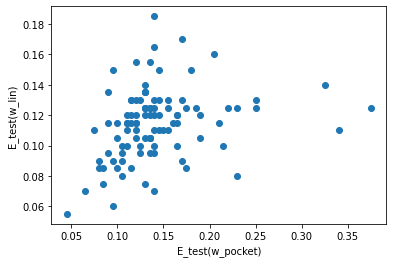

In [ ]:
plt.scatter(error_pocket, error_lin)

plt.xlabel("E_test(w_pocket)")
plt.ylabel("E_test(w_lin)")
plt.show()

#### Subtask 5:
Based on your findings in the previous problem, which algorithm would you recommend to your boss for this data set? Why?

**Pocket Algorithm** 

*Results:*
1. Generates parameters that are close to the target function.
2. The error was not bigger than 10%.

*Problems:*
1. Since the data was not perfectly linearly separable, obtaining error zero is impossible.
2. Takes more time.

**Linear Regression**

*Results:*
1. Works faster and gives a better error rate.

*Problems:*
1. Calculating pseudo-inverse might be impossible sometimes when the matrix is singular.
2. Linear Regression is limited to linear relationships.

Based on the previous problem, we would recommend using Linear Regression Algorithm because after repeating the experiment 100 times, the Linear Regression algorithm showed better results (smaller errors). In this case, Linear Regression is better than Pocket PLA also because it works faster.

# Task 2. Logistic Regression and Gradient Descent 

Perform Logisitic Regression on Iris dataset.

Done by: 

* Danel Batyrbek

For this task we are asked to implement a logistic regression, but with a bit different equation. The cost function in this case is:
$$
  E(w) = \frac{1}{N} \sum_{i=1}^N E^{(i)}(w)
$$
What this basically means, is that we calculate the cost value of each instance, given the weights and average the sum, to find the cost for the dataset, given the weights.

The cost function for one instance is:
$$
  E^{(i)}(w) = \ln{(1 + e^{-y_n(w^Tx_i)})}
$$

When we implement the stocastic gradient descent, we take one instance, and find the gradient on that example. The gradient of the given instance and weights would be:

$$
  \nabla E^{(i)}(w) = \frac{-e^{-y_iw^Tx_i}}{1 + e^{-y_iw^Tx_i}} 
  \begin{bmatrix}
  y_i x_{i0} \\
  y_i x_{i1} \\
  \vdots \\
  y_i x_{iM-1} \\
  y_i x_{iM} \\
  \end{bmatrix}
$$

where $M$ is the number of features.

In [ ]:
# Here we import `numpy`, `pyplot`, `math` and `random` to implement logistic regression.
import math
import random
import matplotlib.pyplot as plt
import numpy as np

# copy to ensure that the arrays are not shared and threading to improve performance
import copy
import threading

# sklearn to load dataset, split, and LogisticRegression to compare results of our custom LR
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load the dataset
data = load_iris()
X = data['data']
y = data['target']

In [ ]:
# Splitting the dataset, with 80% to train, and 20% to test. The random_state is 0,
# to ensure that the dataset is splitted in the same way always

# With 150 instances in the dataset, 80% and 20% are 120 and 30 respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
# It seems that the sklearn.linear_model.LogisticRegression works well
# supporting multiclass classification, giving accuracy of 1.0 and being fast
# as well!

model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
val = model.score(X_test, y_test)
print(val)

1.0


To implement the Logistic Regression, first we attempted to implement a simple binary logistic regression. To keep the code compact and easier to use (for the cross-validation code as well), the binary logistic regression is done in the form of a class. This also helps with implementing multiclass logistic regression, as having simple functions could cause bugs and overwrite different model's dataset.

Notable parts:
- Learning rate is at 0.001
- The number of iterations for stochastic gradient descent is 2000
- `X` is not normalized, as it seems to work this way
- `y` is in `[-1, +1]`
- The model supports `fit(X, y)` and `predict(X)` methods

The `fit(X, y)` works in a simple way:
  1. The data is stored in the model, with adding a bias parameter to `X`
  2. For `T` iterations, we choose random label
  3. And if predicted and true labels are different, update the weight

The `predict(X)` works simply as well:
  1. Add bias parameter to `X`
  2. Take a $\textrm{sign}(w^Tx_i)$ and if:
    * it is bigger than 0, then return 1
    * else, return -1
  3. Repeat for each $i$

There are also `confidence_score(Xi)` which is used by `MulticlassLogisticRegression` and `score(X, y)` which gives a simple accuracy score.

In [ ]:
class BinaryLogisticRegression:

    def __init__(self, learning_rate = 0.001, T = 2000):
        self.X             = None
        self.y             = None
        self.w             = None
        self.N             = 0
        self.feature_count = 0
        self.lr            = learning_rate
        self.T             = T
        self.return_array  = []

    def instance_cost(self, w, instance, label):
        val = np.log(1 + math.exp(-label * (w.T @ instance) ) )
        return val

    def sample_cost(self):
        sum = 0
        for x, y in enumerate(zip(self.X, self.y)):
            sum += self.instance_cost(x, y)
        return sum / self.N


    def gradient(self, w, instance, label):
        res = []
        for val in instance:
            res.append(
              val * label * (-math.exp( -label * (w.T @ instance) ) ) / (1 + math.exp( -label * (w.T @ instance) ))
              )

        return np.array(res)

    def confidence_score(self, instance):
        return instance.T @ self.w

    def correct_weights(self, w, instance, label):
        return w - self.lr * self.gradient(w, instance, label)

    def fit(self, X, y):
        self.X = X
        self.y = y

        if len(X.shape) != 2:
            raise Exception("This doesn't look like a training set with shapes {}".format(X.shape))

        if len(y.shape) != 1:
            raise Exception("This doesn't look like a training set labels with shapes {}. Expected more of a (n, )...".format(y.shape))

        if X.shape[0] != y.shape[0]:
            raise Exception("Instance count and labels count doesn't match up: X -> {} and y -> {}".format(X.shape, y.shape))

        self.w = np.zeros(X.shape[1] + 1)
        self.N = X.shape[0]  
        self.feature_count = X.shape[1]  

        new_X = np.c_[ X, np.ones(self.N) ]

        self.X = new_X

        for i in range(self.T):
            rand_index = random.randint(0, self.N - 1)
          rand_instance = self.X[rand_index]
          rand_label    = self.y[rand_index]

          if self.predict_instance_sign(rand_instance) != rand_label:
            self.w = self.correct_weights(self.w, rand_instance, rand_label)

          self.return_array.append(self.w)

      def predict(self, X):
        res = []
        X = np.c_[ X, np.ones( X.shape[0] ) ]
        for instance in X:
          res.append(self.predict_instance_sign(instance))
        return res

      def predict_instance_sign(self, instance):
        if self.w.T @ instance > 0:
          return 1
        else:
          return -1

      def score(self, X, y):
        predictions = np.array(self.predict(X))
        n = len(X)
        sum = 0
        for label, pred in zip(y, predictions):
          sum += (label - pred) ** 2 / 4

        return 1 - sum / n

`MulticlassLogisticRegression` is a meta-algorithm which actually combines several `BinaryLogisticRegression` models. When given an input, it tries to predict the label, by taking the "best guess", i.e. which model feels most confident about the label.

This class also implements `fit(X, y)` and `predict(X)` methods.

`fit(X, y)` is a very simple method. It takes the unique labels and create a `BinaryLogisticRegression` model for each of the labels. Then it remaps the labels accordingly and trains each of the models on new relabeled data. It uses threads, to increase throughput.

`predict(X)` gets a `confidence_score` from each of `BinaryLogisticRegression` model and labels the data with the most confident label. The confidence score is simply $w^Tx_i$, because the output of $\frac{1}{1 + e^{-w^Tx_i}}$ is directly dependent on the dot product, but it might overflow. As such, simple dot product is better suited for our needs.

In [ ]:
class MulticlassLogisticRegression:
  def __init__(self, learning_rate = 0.001, T = 2000):
    self.N             = 0
    self.lr            = learning_rate
    self.T             = T
    self.models        = []
    self.label_mapping = None
    self.weights       = []

  def normalize_X(self, X):
    #X_min_val = np.min(X)
    #X = X - X_min_val
    #X_max_val = np.max(X)
    #X = X * (1 / X_max_val)
    return X
  
  def fit(self, X, y):
    y = np.array(y)
    X = np.array(X)
    X = self.normalize_X( X )

    self.label_mapping = np.unique(y)

    threads = []

    for target_label in self.label_mapping:
      y_temp = copy.deepcopy(y)
      y_temp[y != target_label] = -1
      y_temp[y == target_label] =  1

      model = BinaryLogisticRegression(learning_rate=self.lr, T=self.T)
      t = threading.Thread(target=model.fit, args=(X, copy.deepcopy(y_temp)))
      self.models.append(model)
      threads.append(t)
      t.start()
    
    for t in threads:
      t.join()

    for model in self.models:
      self.weights.append(model.return_array)

  def predict(self, X):
    new_X = np.c_[ X, np.ones(X.shape[0]) ]
    X = new_X

    predictions = []

    for instance in X:
      mx, likely_label = None, None
      to_print = []
      for label, model in zip(self.label_mapping, self.models):
        val = model.confidence_score(instance)
        to_print.append(val)
        if mx is None:
          mx = val
          likely_label = label
        elif mx < val:
          mx = val
          likely_label = label

      predictions.append(likely_label)
    
    return predictions
  
  def get_error(self, X, y):
    predictions = np.array(self.predict(X))
    new_X = np.c_[ X, np.ones(X.shape[0]) ]
    X = new_X
    err_sum = 0
    for i in range(X.shape[0]):
      cur_label = -1 if predictions[i] != y[i] else 1

      model = self.models[y[i]]
      err_sum += np.log(1 + math.exp(-cur_label * np.array(model.w).T @ X[i]))
    
    return err_sum / X.shape[0]

  def score(self, X, y):
    predictions = np.array(self.predict(X))

    print(y)
    print(predictions)

    n = len(predictions)
    count = 0

    for label, pred in zip(y, predictions):
      if label != pred:
        count += 1
    
    return 1 - (count / n)
  
  def plotErrs(self, X, y, title="", x_label="", y_label=""):
    new_X = np.c_[ X, np.ones(X.shape[0]) ]
    X = new_X

    confidence_scores = []

    predictions = []
    for t in range(self.T):
      cur_weight_predictions = []
      for X_i in X:
        mx = None
        for model_num in range(len(self.label_mapping)):
          model = self.weights[model_num][t]
          val = np.array(model).T @ X_i
          if mx is None or mx < val:
            pred_label = self.label_mapping[model_num]
            mx = val
        cur_weight_predictions.append(pred_label)
      predictions.append(cur_weight_predictions)

    errs = []
    for i in range(self.T):
      err_sum = 0
      for j in range(X.shape[0]):
        cur_label = -1 if predictions[i][j] != y[j] else 1
        pred_label = predictions[i][j]

        model = self.weights[pred_label][i]

        err_sum += np.log(1 + math.exp(-cur_label * np.array(model).T @ X[j]))
      
      err_sum /= X.shape[0]
      errs.append(err_sum)
    
    x_axis = range(self.T)
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_axis, errs)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 2 0 0 2 0 0 0 0 0]
0.5666666666666667


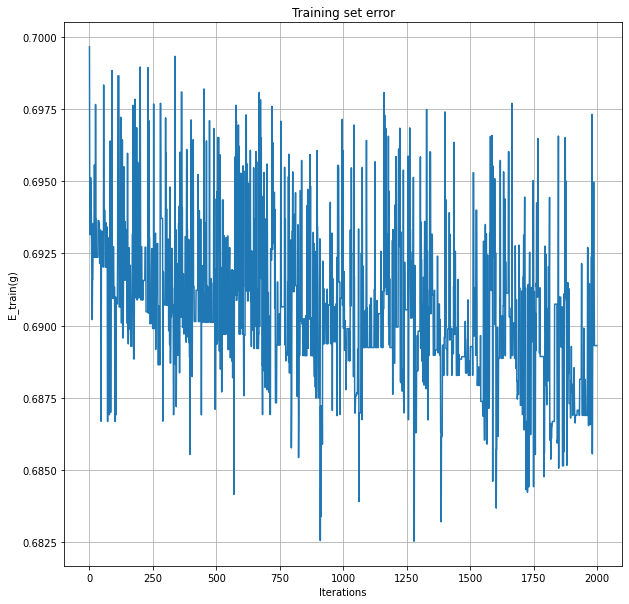

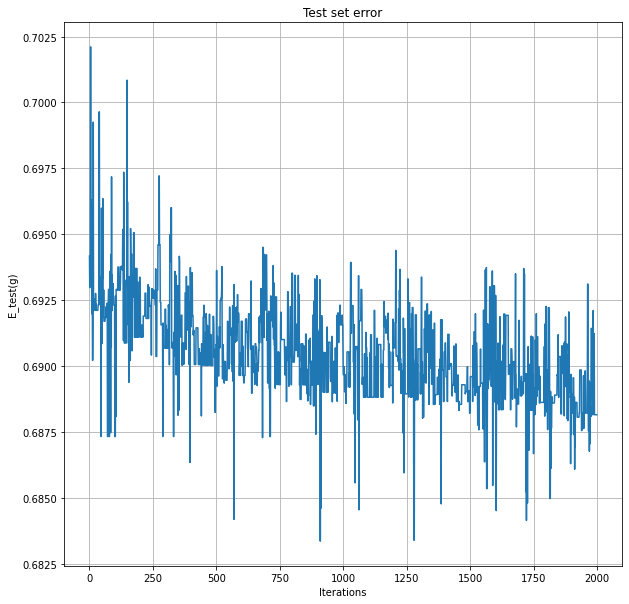

In [ ]:
model = MulticlassLogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model.plotErrs(X_train, y_train, "Training set error", "Iterations", "E_train(g)")
model.plotErrs(X_test, y_test, "Test set error", "Iterations", "E_test(g)")

Here are two plots of the $E_{train}(g)$ and $E_{test}(g)$ are given.

The number of iterations is very large, and as such, and because of that, the error plot is very difficult to read. However, we can see that there is a trend of an error being slowly reduced with time. But the rate of reduction is not fast enough, and thus, to push the error down to 0, there are more iterations needed.

However, the problem is also with the stochastic gradient descent algorithm. Because of it, the accuracy ranges from $0.5$ to $0.96$. A different algorithm may give better improvement of an accuracy score.

There is also used a different cost function. Although similar, it is difficult to say, how well this function is suited to be a cost function. But it performs well, as it meets the basic needs of a cost function.

# Task 3. Practical design of a learning algorithm
Perform model selection with Optical Recognition of handwritten Digits Data Set.

Done by:
* Saniya Abushakimova
* Danel Batyrbek
* Nuradil Kozhahmet

#### Subtask 3

For the third task we used a digits dataset.

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [ ]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [ ]:
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

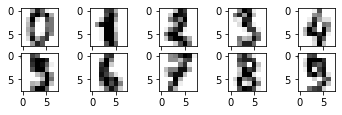

In [ ]:
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

#### Subtask 4

(a) Write a function that divides the on digits dataset (training) set (of size $m$) into n disjoint sets $S_{1}$, ..., $S_{n}$ of equal size $n/m$

In [ ]:
# Function splitting the training data into n disjoint sets.
def n_fold_split(X_train, y_train, n):
  m = X_train.shape[0]-1
  X_splits = []
  y_splits = []
  splits = int(np.ceil(m/n))

  for i in range(n-1):
    X_splits.append(X_train[i*splits:(i+1)*splits])
    y_splits.append(y_train[i*splits:(i+1)*splits])

  # Handling the remaining subset in case m/n is not a whole number
  X_splits.append(X_train[(n-1)*splits:])
  y_splits.append(y_train[(n-1)*splits:])

  # Checking if the data was splitted correctly.
  shapes = 0
  for split in X_splits:
    shapes += len(split)
  
  #print("A fold size = ", splits)
  #print("Sum of all disjoint sets = ", shapes)
  #print("The size of the whole dataset = ", X_train.shape[0])

  return X_splits, y_splits

(b) For each $S_i$: \\
  • Train a classifier (e.g. Lin Reg. Log Reg) on $S\backslash S_{i}$ \\
  • Test it on $S_i$ ← $error(i)$

In [ ]:
def CVError(model, X, y, n, OHE=False):
  if OHE:
    targets = np.array(y).reshape(-1)
    y = np.eye(10)[targets]
  X_splits, y_splits = n_fold_split(X, y, n)
  err_sum = 0
  for fold in range((len(X_splits))):
    # Setting current fold to be a test set.
    X_test = X_splits[fold]
    y_test = y_splits[fold]
  
    # Merging the remaining folds to a training set.
    X_train_folds = np.delete(X_splits, fold)
    y_train_folds = np.delete(y_splits, fold)
    
    X_train = []
    y_train = []
    
    for X_fold, y_fold in zip( X_train_folds, y_train_folds ):
      for instance in X_fold: X_train.append(instance)
      for label    in y_fold: y_train.append(label   )
    
    model.fit(X_train, y_train)

    err_sum = model.get_error(X_test, y_test)

  return err_sum / n  

(c) Output the average error.

In [ ]:
folds_num = [5, 10, 20]

for n in folds_num:
  # for model, modelname in models:
  print("{}'s Cross-validation error with {} folds: {}".format('Linear Regression', n, CVError(LinearRegression(), X, y, n, OHE=True)))
  print("{}'s Cross-validation error with {} folds: {}".format('Logistic Regression', n, CVError(MulticlassLogisticRegression(), X, y, n)))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Linear Regression's Cross-validation error with 5 folds: 0.02857142857142858
Logistic Regression's Cross-validation error with 5 folds: 0.05866984780017063
Linear Regression's Cross-validation error with 10 folds: 0.012429378531073444
Logistic Regression's Cross-validation error with 10 folds: 0.025607433571913946
Linear Regression's Cross-validation error with 20 folds: 0.005747126436781607
Logistic Regression's Cross-validation error with 20 folds: 0.012355544776962234


#### Subtask 5

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LinReg = Ridge()
LogReg = LogisticRegression(random_state=0)

GridLinReg = GridSearchCV(LinReg, {'alpha': [0.5, 1.0, 1.5, 2.0, 5.0, 10.0]})
GridLogReg = GridSearchCV(LogReg, {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [0.5, 1.0, 1.5, 2.0]})

GridLinReg.fit(X, y)
GridLogReg.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 1.0, 1.5, 2.0],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
GridLinReg.best_params_

{'alpha': 2.0}

In [ ]:
GridLogReg.best_params_

{'C': 0.5, 'penalty': 'l2'}

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.linear_model import RidgeClassifier
import numpy as np

def draw_validation_curve(model, param_name, param_range):
  train_scores, test_scores = validation_curve(
      model, X, y, param_name=param_name, param_range=param_range, n_jobs=1)

  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.title("Validation Curve with Linear Regression")
  plt.xlabel(param_name)
  plt.ylabel("Score")
  plt.plot(param_range, test_scores.mean(axis=1), lw=2, label='cross validation')
  plt.plot(param_range, train_scores.mean(axis=1), lw=2, label='train')
  plt.legend()
  plt.show()

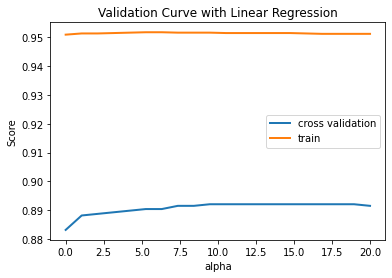

In [ ]:
param_range = np.linspace(0., 20, 20)
model = RidgeClassifier()
param_name = 'alpha'
draw_validation_curve(model, param_name, param_range)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1. / C, sample_weight),
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:301: RuntimeWarning: invalid value encountered in double_scalars
  loss += 0.5 * alpha * squared_norm(w)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:353: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] += alpha * w
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1. / C, sample_weight),
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:301: RuntimeWarning: invalid value encountered in double_scalars
  loss += 0.5 * alpha * squared_norm(w)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:353: RuntimeWarning: invalid value enco

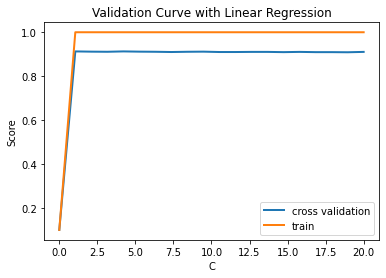

In [ ]:
param_range = np.linspace(0., 20, 20)
model = LogisticRegression()
param_name = 'C'
draw_validation_curve(model, param_name, param_range)

# Task 4. KAGGLE Competition
Competition: **Fashion-MNIST**

Done by:
* Nuradil Kozhahmet

In [ ]:
import numpy as np 
import pandas as pd
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
from torch.autograd import Variable

In [ ]:
# Download FashionMNIST dataset
train_set = torchvision.datasets.FashionMNIST(root='.', train=True, download=True, transform=None)
test_set = torchvision.datasets.FashionMNIST(root='.', train=False, download=True, transform=None)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# Fashion MNIST Dataset class which would be sent to DataLoader
class fashionMnistDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform
    
    def __len__(self):
        return len(self.data)
        
    def __getitem__(self, idx):
        x, y = self.data[idx]
        if self.transform:
            x = self.transform(x)
        return x, y

In [ ]:
# We have to convert PIL image to tensor, thus we need to have transformatoin
transforms = torchvision.transforms.Compose([
   torchvision.transforms.ToTensor(),
])

train_dataset = fashionMnistDataset(train_set, transforms)
test_dataset = fashionMnistDataset(test_set, transforms)

# Train and Validation splitter 
train_dataset, val_dataset = random_split(train_dataset, [int(len(train_dataset) * 0.8), int(len(train_dataset) * 0.2)])
train_loader = DataLoader(train_dataset, batch_size=256)
val_loader = DataLoader(val_dataset, batch_size=256)
test_loader = DataLoader(test_dataset, batch_size=256)

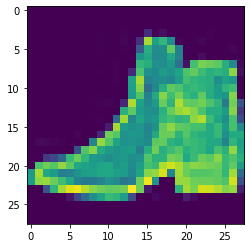

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_dataset[4][0].squeeze())
plt.show()

In [ ]:
# Model architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers
        self.convs = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # Fully connected layers
        self.final = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(2304, 600),
            nn.Linear(600, 120),
            nn.Linear(120, 10),
            nn.Softmax(),
        ) 
        
    def forward(self, x):
        logits = self.convs(x)
        outputs = self.final(logits)
        return outputs

In [ ]:
model = CNN()
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model

CNN(
  (convs): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (final): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.5, inplace=False)
    (2): Linear(in_features=2304, out_features=600, bias=True)
    (3): Linear(in_features=600, out_features=120, bias=True)
    (4): Linear(in_features=120, out_features=10, bias=True)
    (5): Softmax(dim=None)
  )
)

In [ ]:
# This function calculates Loss and Accuracy of model on the given dataset.
def calculate_metrics(model, data_loader, criterion):
    total_loss, total_correct, total_rows = 0, 0, 0
    with torch.no_grad():
        for batch in data_loader:
            inputs, labels = batch

            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            total_correct += (torch.argmax(outputs, axis=1) == labels).sum()
            total_rows += len(labels)

    return total_loss / len(data_loader), total_correct / total_rows

# The train function trains model according to the given hyperparameters
def train(model, epoch_num=100, lr=0.0001, patience=10):
    model.train()
    model.to(device)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    best_loss, cnt = 1e9, 0
    
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []
    
    for epoch in range(epoch_num):
        for batch in train_loader:
            inputs, labels = batch
            
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        train_loss, train_acc = calculate_metrics(model, train_loader, criterion)
        val_loss, val_acc = calculate_metrics(model, val_loader, criterion)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(model, 'best_model.pt')
            cnt = 0
        else:
            cnt += 1
        
        print('Epoch {}: Train loss {}, Train accuracy {}, Val loss {}, Val accuracy {}'.format(epoch, train_loss, train_acc,
                                                                                     val_loss, val_acc))
        
        if patience == cnt:
            print('Exiting the training because of the run out of the patience')
            break
            
    model = torch.load('best_model.pt')
    model.eval()
          
    test_loss, test_acc = calculate_metrics(model, test_loader, criterion)
    
    print('Test loss {}, Test accuracy {}'.format(test_loss, test_acc))
            
    # losses
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.title('Losses')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # accuracies
    plt.plot(train_accuracies)
    plt.plot(val_accuracies)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 0: Train loss 1.6491400276092774, Train accuracy 0.8237500190734863, Val loss 1.6513524207663028, Val accuracy 0.8244166374206543
Epoch 1: Train loss 1.6148119131301313, Train accuracy 0.8541458249092102, Val loss 1.6192018732111504, Val accuracy 0.8499999642372131
Epoch 2: Train loss 1.602501410753169, Train accuracy 0.863895833492279, Val loss 1.6075933436129957, Val accuracy 0.859250009059906
Epoch 3: Train loss 1.5968579193379016, Train accuracy 0.8679375052452087, Val loss 1.6011360553984946, Val accuracy 0.8633333444595337
Epoch 4: Train loss 1.588972307900165, Train accuracy 0.8745625019073486, Val loss 1.5951779066248144, Val accuracy 0.8689166307449341
Epoch 5: Train loss 1.5870712583369397, Train accuracy 0.8768333196640015, Val loss 1.5948156143756622, Val accuracy 0.8697499632835388
Epoch 6: Train loss 1.582300728939949, Train accuracy 0.8807083368301392, Val loss 1.5885376321508529, Val accuracy 0.875249981880188
Epoch 7: Train loss 1.5823005938783605, Train accuracy

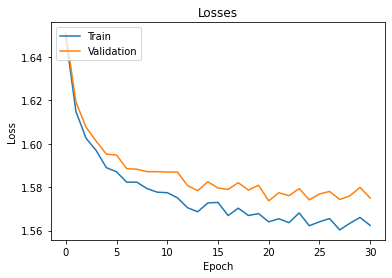

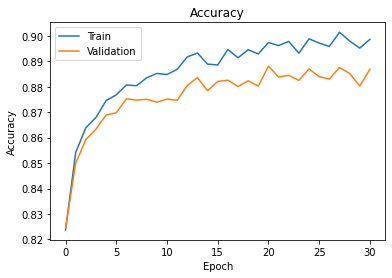

In [ ]:
train(model)